# SmasHack! 👾

Exam project of the Artifical Intelligence Fundamentals course [643AA], a.y. 2023/24

**Developed by the Hackward Hackers:**
- [Daniele Bedini](https://github.com/danielebedini)
- [Francesca Poli](https://github.com/francescapoli98)
- [Gioele Modica](https://github.com/pavomod)
- [Giovanni Criscione](https://github.com/gcriscione)

<img src="img/smashack.png" width="80">  *Github repo: https://github.com/AIF-2023/AIF-Project*

## Introduction

The project is based on an intelligent agent that plays a custom level in the Nethack rogue game. The agent is inserted into a room, which is the enviroment it has to percept. The agent has to firstly pick up and wield a weapon, then kill all the monsters and, finally, finish the level exiting through the stairs and win.

The agent's aim is to use a searching algorithm to reach the desired targets one at a time, following the order previously listed: weapon, monsters, stairs. At each step of the agent, the heuristic will evaluate the best possible move, taking into consideration the targets' order and placement, and the agent's health level represented as hit points: the heuristic needs to predict all the possible scenarios and choose the one that seems to be the most convenient at the moment in order to take a step in one direction. 

#### Agent type:
**Utility-based** agent that ponderates step by step each possible set of states stemming from the move it is about to make, with the aim of cacthing all the targets and finishing the game level.

#### Environment type:
-  Fully observable
-  Non deterministic (the agent doesn't know what the monsters' next moves will be)
-  Episodic 
-  Dynamic
-  Discrete
-  Single-agent

#### High-level characterization of the task environment through **PEAS** descriptors:
**Performance Measure:** fast, safe (the agent preserves its health) 

**Environment:** monsters (Zombie Kobold), weapon (dagger), stairs (entry and exit) 

**Actuators:** moves, fight, pickup, wield

**Sensors:** proximity


--------------------------------------------

We solved this task by developing two different heuristics: 
- **Tactical heuristic (heuristic_GG.py):** the agent is told exaclty what to do considering the percepts received in input, which are treated as a Class and fed to the heuristic function in a more direct approach. The function returns to the agent a score for each move that is calculated after an in-depth analysis of the environment's situation and the number of hit points. 
- **Greedy heuristic (heuristic_FD.py):** the agent is guided by a system of priorities based off the percepts received in input, that converge into a weighted sum of all the targets' importance considering their order and proximity, and the number of hit points.

## Related work

We developed this project using Python 3.11, exploiting the [Minihack](https://minihack.readthedocs.io/en/latest/) framework and documentation.
As for the libraries, we imported [gym](https://www.gymlibrary.dev/) and the [NetHack Learning Environment (nle)](https://github.com/facebookresearch/nle).

For the customisation of the environment we consulted the [NetHack Wiki](https://nethackwiki.com/wiki/Main_Page) and the [Guidebook for NetHack](https://www.nethack.org/download/3.6.5/nethack-365-Guidebook.pdf).

Moreover, we consulted the report of the *I Matematici*'s project from last year published on Moodle, the [Genetic Algorithms for NetHack](https://elearning.di.unipi.it/pluginfile.php/76058/mod_resource/content/5/AIF_Project.pdf), as inspiration for out report's structure.

## Methodologies

### Heuristic #1: greedy approach

This heuristic is based on calculating a final score by means of a weighted sum of each target (the weapon, the monsters to be fought and the exit) that assigns each cell that could be the agent's next move a different value. We have developed 3 different sets of weights:
- a **default set**, to be used when the agent is healthy and has not yet picked up and wielded the weapon.

Here, the priority scale is as follows: first, the agent must find and take the weapon, so its target is assigned a higher weight. After that, the second most important targets are the monsters, so they are assigned an intermediate weight. Finally, the exit becomes unimportant, therefore it is assigned a minimal weight.

- a **weapon set** to be used when the agent is wielding the weapon and still has good health.

In this case, the highest priority is given to monster targets, while the weight for the weapon becomes exactly 0. In this way the agent completely ignores any other weapons that might be there. There are no other weapons anyway, because they have not been set in the map layout, but from our tests it was assessed that the method works. Finally, a low weight is always assigned to the exit.

- a set for **'danger mode'**, i.e. when the agent has low hit points and is risking its life, so it must think about running away.

The latter set is used when the hit points' value is very low, less than half of the maximum recorded if the agent is not wielding a weapon and less than 40% if it has one. In this case, 0 is again assigned to the weight of the weapon and minimum value to the output, but the peculiarity lies in the weight of the monsters, which is a large negative number. 

Step by step the heuristic evaluates which set is the best to be assigned to deal with the current situation in the room.  

### Heuristic #2: tactical approach

write something here [...]

### 🔋 Healthcare: considering hit points in decision-making


The agent's **hit points** are an index of its health state: the default starting number of hit points is 16, but they can go down because of the monsters' attacks or grow thanks to the level ups, even exceeding the default value.

Obviously, we want the agent to always win the game, meaning that we can't let it get killed easily when the health is not strong. That's why our heuristics also contain a check that triggers a sort of *alert mode*, making the agent run away from danger. 
Taking into consideration that the agent can recover the hit points by leveling up or waiting without fighting, the best move when it has poor health becomes... *Run ~~boy~~ agent, run*! 🏃 

This escape mode is developed differently in the two heuristics.

- The **first heuristic** involves the presence of a BRAVE variable, which indicates the agent's courage. A percentage is constantly calculated that relates BRAVE to the number of hit points of the agent: the higher the value of BRAVE, the lower this percentage must be in order for the agent to continue on his or her usual path, going towards the weapon to be collected or the monsters to be fought. If, on the other hand, the agent is set as less brave, then a higher percentage will suffice to trigger the escape. The heuristics are set up in such a way as to push the agent towards corners, where it can take refuge until the monsters approach. Once it realises it has one close by, it always moves to the edge of the room.
- The **second heuristic**, on the other hand, involves the use of a different set of weights that also uses negative values assigned to the monsters to make the agent move in the opposite direction to them. If the agent has already picked up the weapon, then it will only flee if the percentage of hit points remaining compared to the highest value recorded is lower than 40%, because it has a better chance of not dying in combat and will probably be able to move on in the game. Otherwise, it will flee if it has less than 50% of the hit points.


 

### Project development

In the beginning, we structured the foundations of the project together, going on to create customised maps and an environment that was suitable for the type of task we wanted to develop. So, together we researched and selected the basic features of the game. Then, we divided into two subgroups corresponding to the heuristics to be developed: one group, consisting of Francesca Poli and Daniele Bedini, developed the greedy heuristics, while the group of Gioele Modica and Giovanni Criscione created the tactical heuristics. After finishing the refinement of the two heuristics, all together we did statistical analyses and plots on the performance of the two heuristics compared to a baseline with a random approach, and together we wrote the report explaining each work step.

We start by creating the new custom environment that was defined in *utils.py*. 
Race, role, sex, and alignment of the agent are generated randomly, while both the compass' directions and the commands PICKUP, WIELD and FIRE are initialised. The commands are taken from Minihack's [action spaces](https://minihack.readthedocs.io/en/latest/getting-started/action_spaces.html).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from heuristic_FD import heuristic_fd
from heuristic_GG import heuristic_gg, BRAVE_PLAYER

# this function starts the game, it takes as input the heuristic to use    
def start_game(heuristic: Callable[[np.ndarray, Tuple[int, int], Tuple[int, int], int, bool], int]):

    # initialize the environment
    state = env.reset()
    game_map = state['chars']
    game = state['pixel']

    # get the locations of the player, the target and the weapons
    start = get_player_location(game_map)
    end_target = get_target_location(game_map)
    weapons = get_weapon_location(game_map)

    # plot the initial state
    player_moves = [start]
    image = plt.imshow(game[:, 300:975])

    # initialize the game
    end_state = False # if the game is over
    hp_rate = 1 # hp rate, at the beginning is 100%
    weapon_in_hand = False # if the player has a weapon
    total_moves = 0 # total moves
    hp_history = np.array([]) # hp history
    moves_history = np.array([]) # moves history, 1 move = 1 time unit

    # start the game, it goes until the player dies or reaches the target
    while not end_state:
        
        # get the current position of the player
        current_position = get_player_location(game_map)

        # get the best move, in according to the chosen heuristic
        coord = get_best_move(game_map, current_position, end_target, heuristic, hp_rate, weapon_in_hand)

        # if the agent is on a weapon, pick it up and wield it
        if len(weapons)>0 and not(weapon_in_hand) and current_position in weapons: 
            pickup() 
            wield()
            weapon_in_hand = True # now the agent has a weapon
        
        # update step
        game_map, _, end_state, _ = env.step(actions_from_path(current_position,[coord])[0])

        # update hp rate
        hp = game_map["blstats"][10]
        max_hp = game_map["blstats"][11]
        if hp > 0:
            hp_rate = (hp/max_hp)

        # update the map
        game_map=plot_map(game_map,image)
        player_moves.append(coord)

        # update the total moves
        total_moves += 1
        
        # for plots
        moves_history = np.append(moves_history, total_moves)
        hp_history= np.append(hp_history, hp_rate)

    return hp_history, moves_history

# starts the game with the two heuristics and plots the hp history in relation to the total moves
def game():
    # start the game with the two heuristics
    hp_history_fd, moves_history_fd = start_game(heuristic_fd)
    hp_history_gg, moves_history_gg = start_game(heuristic_gg)

    # plot hp history, this plot shows the hp rate in relation to the total moves
    # the graph is shared betweeen the two heuristics, there is also a threshold line (brave rate)
    hp_plots(hp_history_fd, moves_history_fd, hp_history_gg, moves_history_gg, round(1-BRAVE_PLAYER,1))

### DEMO

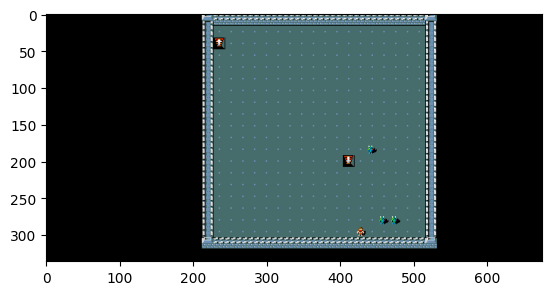

In [ ]:
game() # start the game

## Assessment

In this section, the aim is to compare the two heuristics emphasising the disparity between the **greedy** and the **tactical** approach. Several tests were conducted on two maps with a parameter indicating courage, called **brave** parameter: one in which the agent starts in less critical conditions and the other where the agent starts already surrounded by monsters. 

The comparison parameters concern the health and the number of steps of the agent. In order to set a baseline for our results and validate our statistics, we also inserted an analysis of the behaviour of an agent that moves completely randomly, without any heuristics. This was made in order to illustrate how easily an agent without any reasoning fails. 

The performance evaluation is based on the **percentage of remaining hit points** and the **total number of steps** at the end of execution. A for the graphs shown the following paragraphs, a selection of two significant plots for each task has been made.

### Agent not surrounded by monsters

During execution with the *brave* parameter's threshold set to **1**, the agent shows an inclination to attack monsters regardless of the current life percentage. From the graphs, it emerges that the heuristic with the greedy approach (#1) tends to lose more life than the one that exploits a tactical approach (#2), as it aims to attack the closest monster with the goal of minimising the number of steps, without worrying about the surrounding monsters. This heuristic almost always succeeds in eliminating all monsters with fewer steps, but at the cost of putting the health at serious risk.

The tactical heuristic (#2) takes more steps, but selects the targets more wisely, based not only on distance but also on the number of monsters around the said hypothetical target. In contrast to the greedy approach, one observes that the agent tends to take a higher number of steps, but manages to maximise the health percentage, trying to keep it as high as possible.

![alt text](img/combattimento1.png "Title") 

During execution with the *brave* parameter's threshold set to **0**, the agent shows a propensity to constantly flee from monsters. The greedy heuristic's results, shown in the plots as heuristic #1, demonstrate that the strategy of escaping from monsters is more risky than the other heuristic, as it also tends to consider to move on dangerous cells that might allow the agent to escape from a group of monsters, but also lead the agent towards another group of lethal creatures.

As can be seen from the graphs, the greedy heuristic often succeeds in recovering health and evading the monsters, but with a higher level of risk. In contrast, the tactical approach (#2) shows greater success as it tends to choose safer routes, focusing on the totality of the monsters rather than a single subgroup, thus ensuring a safer and more consistent escape.

Moreover, we conducted a test on the same map using a **random approach** (plotted in green) in which the agent randomly selects the next move. As the plots show, as soon as the agent is reached by monsters, it shows an immediate tendency to die, as it does not make decisions by evaluating perceptions of the current environment.

![alt text](img/fuga1.png "Title")

### Monsters surrounding the agent

In this context we generated a map by positioning the monsters so that the agent starts in a trap situation, creating a more difficult environment. 
We set the *brave* parameter's threshold to **0.5** in order to achieve a compromise between escape and combat mode. The plots of two different tests show that this task requires more steps even for the greedy heuristic (#1) which tends to apply almost constantly the escape mode, which allows not only to run away from monsters but also to face some of them in critical situations such as being surrounded. 

The tactical heuristic (#2), on the other hand, tends to initially move as far away from the monsters as possible and running away from the trap situation in order to recover life, and then face them with more confidence. We can see that both heuristics mostly tend to complete the task, but in this case the greedy heuristic can get about twice as many steps to perform. Moreover, we performed a further test with the random moving agent, showing that in this case it tends to die immediately, absolutely unable to escape from the trap situation.


![alt text](img/05brave1.png "Title")

## Conclusion